## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [2]:
df = pd.read_excel(r"H:\Guvi\Project\Industrial Copper Model\End to End ML Project\notebook\Copper_Set.xlsx")

### Exploratory Data Analysis

In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
df.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.686538,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [6]:
df.shape

(181673, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
## checking for distinct values in each column
for i in df.columns:
    print(i, len(df[i].unique()))

id 181672
item_date 253
quantity tons 181673
customer 1170
country 18
status 10
item type 7
application 31
thickness 595
width 1386
material_ref 16564
product_ref 33
delivery date 29
selling_price 9796


id column can be removed as it does not provide anything for the output feature

In [9]:
df.drop(columns='id', axis=1, inplace=True)

In [10]:
## checking categorical feature for distinct value counts 
categorical_columns = []
for i in df.columns:
    if len(df[i].unique())<=33:
        categorical_columns.append(i)
        print(df[i].value_counts())
print(categorical_columns)

country
78.0     32084
26.0     27516
25.0     23362
27.0     21511
32.0     18658
28.0     15824
84.0     12776
77.0      9714
30.0      8702
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: count, dtype: int64
status
Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
application
10.0    77544
41.0    46261
15.0    20772
59.0     8927
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       2

As you can see item_date and delivery date are in float so, converting them to datetime format.

In [11]:
df[df.index==1512]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
1512,20210331.0,53.756108,30198577.0,27.0,Won,PL,10.0,1.5,1125.0,BN001603,640665,20210601.0,894.48


In [12]:
## since I got error while running format correction, I did this changes 
df['item_date'] = df['item_date'].replace(19950000.0, 19950101.0)

In [13]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [14]:
## since there is item_date and delivery date so created new feature duration with repect to that
df['duration'] = abs(df['item_date'] - df['delivery date'])

In [15]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,duration
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91 days
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00,0 days
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90 days
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90 days
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31 days


In [16]:
df.tail()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,duration
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,2020-07-01,591.0,1 days
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,2020-07-01,589.0,1 days
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,2020-07-01,619.0,1 days
181671,2020-07-02,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,2020-07-01,601.0,1 days
181672,2020-07-02,406.686538,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,2020-07-01,607.0,1 days


As you can see quantity tons are in float so, converting them to  float format.

In [17]:
## since I got error while running format correction, I did this changes 
df['quantity tons'] = df['quantity tons'].replace('e', np.nan)

In [18]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   item_date      181671 non-null  datetime64[ns] 
 1   quantity tons  181672 non-null  float64        
 2   customer       181672 non-null  float64        
 3   country        181645 non-null  float64        
 4   status         181671 non-null  object         
 5   item type      181673 non-null  object         
 6   application    181649 non-null  float64        
 7   thickness      181672 non-null  float64        
 8   width          181673 non-null  float64        
 9   material_ref   103754 non-null  object         
 10  product_ref    181673 non-null  int64          
 11  delivery date  181670 non-null  datetime64[ns] 
 12  selling_price  181672 non-null  float64        
 13  duration       181668 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(7), in

In [20]:
## Checking for null values in each column
df.isna().sum()

item_date            2
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
duration             5
dtype: int64

<Axes: >

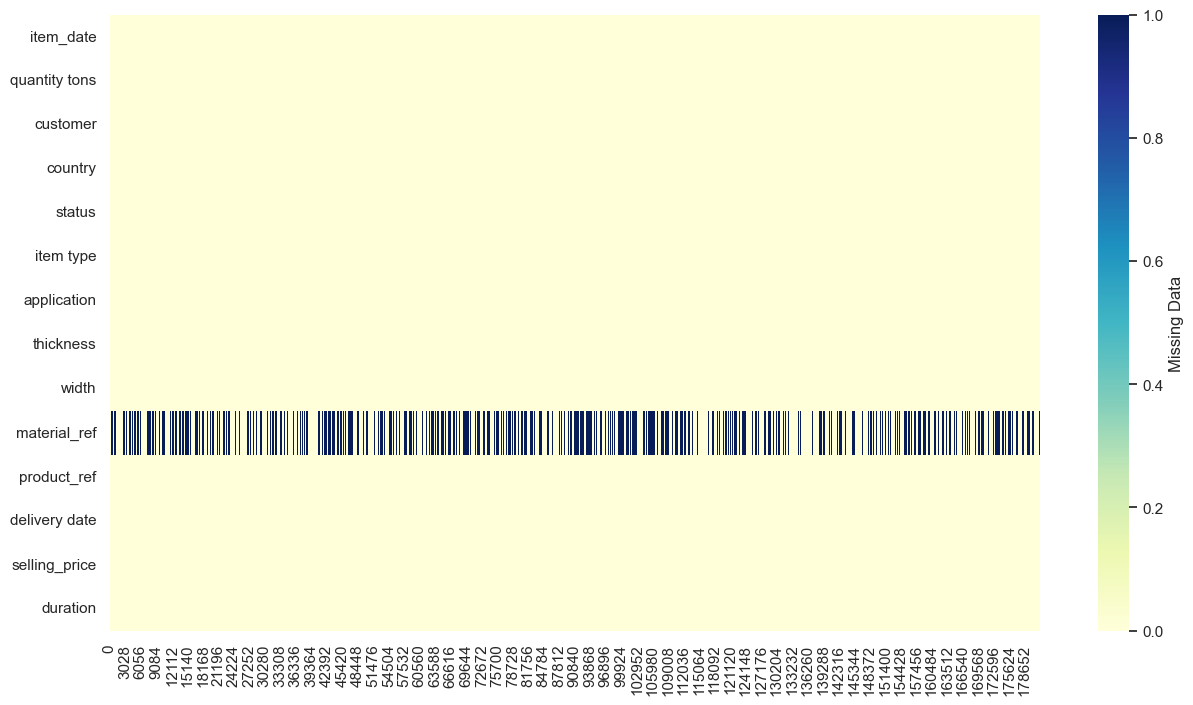

In [21]:
## Visualising null values 
sns.set(rc = {'figure.figsize':(15, 8)})
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})

In [22]:
## checking for percentage of null values with respect to dataset
df.isnull().mean().sort_values(ascending=True)

item type        0.000000
width            0.000000
product_ref      0.000000
quantity tons    0.000006
customer         0.000006
thickness        0.000006
selling_price    0.000006
item_date        0.000011
status           0.000011
delivery date    0.000017
duration         0.000028
application      0.000132
country          0.000154
material_ref     0.428897
dtype: float64

As you can see, only material_ref feature has nearly half of missing values.We can use mean, median and mode to fill all the other features except material_ref.

In [23]:
df['item_date'] = df['item_date'].fillna(df['item_date'].mode()[0])
df['quantity tons'] = df['quantity tons'].fillna(df['quantity tons'].median())
df['customer'] = df['customer'].fillna(df['customer'].mode()[0])
df['country'] = df['country'].fillna(df['country'].median())
df['status'] = df['status'].fillna(df['status'].mode()[0])
df['application'] = df['application'].fillna(df['application'].median())
df['thickness'] = df['thickness'].fillna(df['thickness'].median())
df['delivery date'] = df['delivery date'].fillna(df['delivery date'].mode()[0])
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].median())
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [24]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,duration
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91 days
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00,0 days
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90 days
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90 days
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31 days


In [25]:
df.tail()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,duration
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,2020-07-01,591.0,1 days
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,2020-07-01,589.0,1 days
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,2020-07-01,619.0,1 days
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,2020-07-01,601.0,1 days
181672,2020-07-02,406.686538,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,2020-07-01,607.0,1 days


In [26]:
## Since some values contains garbage value('0') at the start so removing with left strip technique
df['material_ref'] = df['material_ref'].str.lstrip('0')    

In [27]:
## Used random sampling imputation for filling nan values since data is missing at random and also considering there are many categorical values
def impute_nan_material(df, feature):
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

impute_nan_material(df, 'material_ref')

In [28]:
df.shape

(181673, 14)

<Axes: >

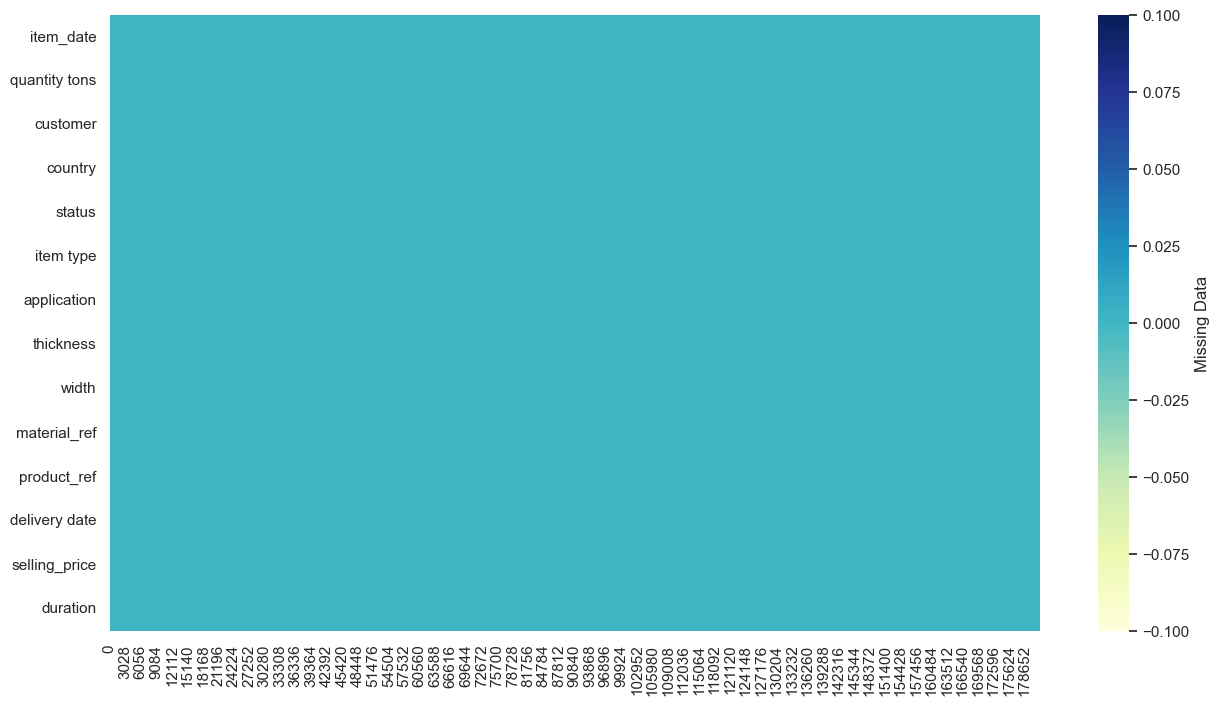

In [29]:
## Checking for null values after imputing null values with mean/median/mode/random sampling
sns.set(rc = {'figure.figsize':(15, 8)})
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})

In [30]:
## Selecting columns except categorical columns that has albhabetical characters
df_corr = df[['item_date', 'quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'delivery date', 'selling_price', 'duration']]

In [31]:
## Pearson correlation 
df_pearson_corr = df_corr.corr(method='pearson')
df_pearson_corr

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,duration
item_date,1.000000,-0.004078,-0.003636,-0.008290,-0.007356,0.000558,0.008549,0.043834,0.884989,0.004285,0.239782
quantity tons,-0.004078,1.000000,-0.000031,-0.001530,-0.001955,-0.000640,-0.000428,-0.001086,-0.002770,-0.000010,0.000615
customer,-0.003636,-0.000031,1.000000,-0.006669,-0.006869,0.009589,0.009203,-0.007716,-0.002908,-0.000053,-0.001344
country,-0.008290,-0.001530,-0.006669,1.000000,-0.019304,-0.019645,0.055229,-0.147326,-0.092229,0.002993,-0.209263
application,-0.007356,-0.001955,-0.006869,-0.019304,1.000000,-0.059531,-0.204478,-0.131784,-0.078509,0.001462,-0.148485
thickness,0.000558,-0.000640,0.009589,-0.019645,-0.059531,1.000000,0.161713,0.038081,0.014611,-0.001130,0.027083
width,0.008549,-0.000428,0.009203,0.055229,-0.204478,0.161713,1.000000,-0.034460,0.030007,0.000583,0.034483
product_ref,0.043834,-0.001086,-0.007716,-0.147326,-0.131784,0.038081,-0.034460,1.000000,0.096195,0.002118,0.141335
delivery date,0.884989,-0.002770,-0.002908,-0.092229,-0.078509,0.014611,0.030007,0.096195,1.000000,0.001412,0.606082
selling_price,0.004285,-0.000010,-0.000053,0.002993,0.001462,-0.001130,0.000583,0.002118,0.001412,1.000000,0.000813


<Axes: >

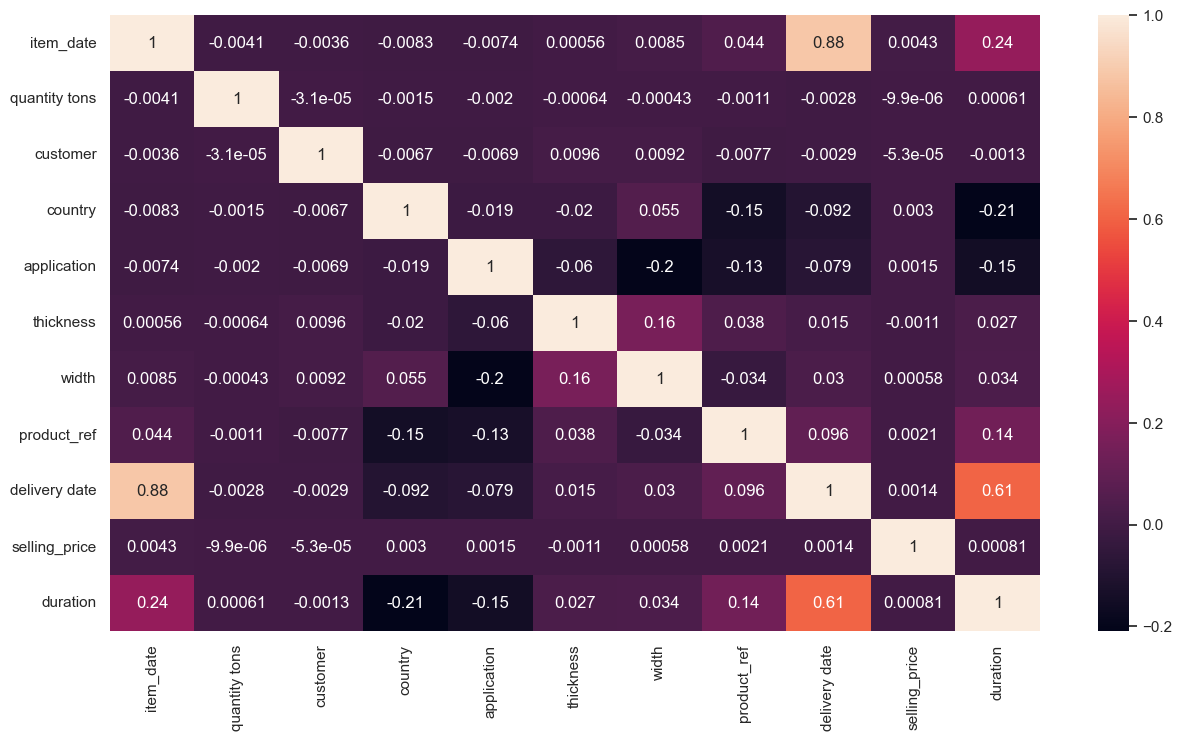

In [32]:
## Visualising pearson correlation 
sns.set(rc = {'figure.figsize':(15, 8)})
sns.heatmap(df_pearson_corr, annot=True)

In [33]:
## Spearman correlation 
df_spearman_corr = df_corr.corr(method='spearman')
df_spearman_corr

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,duration
item_date,1.000000,-0.015032,0.006381,-0.008896,-0.015743,0.011447,0.009458,0.020404,0.922686,0.611308,0.436760
quantity tons,-0.015032,1.000000,0.121349,-0.080209,0.064285,0.037208,0.044815,0.077727,0.019465,-0.043746,0.105937
customer,0.006381,0.121349,1.000000,0.094980,-0.024664,0.124809,0.078891,0.008401,0.032090,-0.012125,0.071539
country,-0.008896,-0.080209,0.094980,1.000000,-0.062407,-0.077027,0.029038,-0.099875,-0.073734,-0.008848,-0.173083
application,-0.015743,0.064285,-0.024664,-0.062407,1.000000,-0.190431,-0.173444,-0.217497,-0.074733,0.131595,-0.155163
thickness,0.011447,0.037208,0.124809,-0.077027,-0.190431,1.000000,0.375221,0.503385,0.052598,-0.453901,0.102917
width,0.009458,0.044815,0.078891,0.029038,-0.173444,0.375221,1.000000,0.125434,0.033359,-0.172152,0.060626
product_ref,0.020404,0.077727,0.008401,-0.099875,-0.217497,0.503385,0.125434,1.000000,0.070785,-0.307803,0.132679
delivery date,0.922686,0.019465,0.032090,-0.073734,-0.074733,0.052598,0.033359,0.070785,1.000000,0.591536,0.706443
selling_price,0.611308,-0.043746,-0.012125,-0.008848,0.131595,-0.453901,-0.172152,-0.307803,0.591536,1.000000,0.299486


<Axes: >

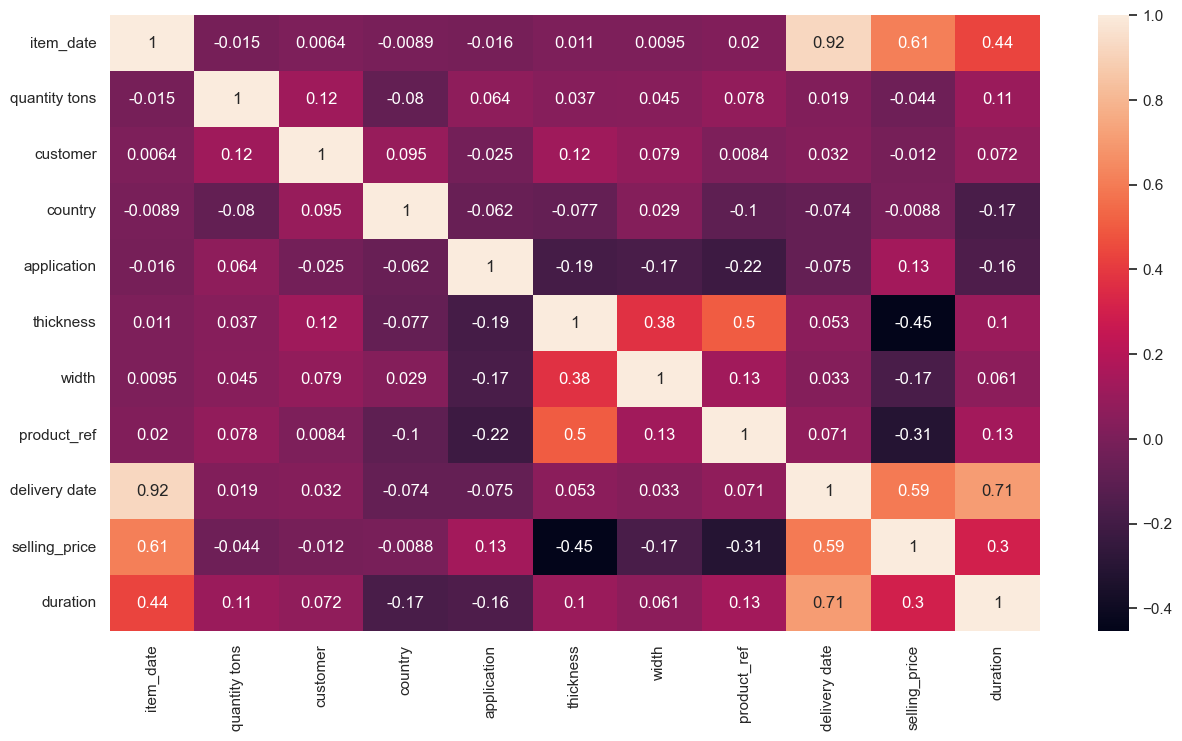

In [34]:
## Visualising spearman correlation 
sns.set(rc = {'figure.figsize':(15, 8)})
sns.heatmap(df_spearman_corr, annot=True)

From spearman correlation,  item_date and delivery_date are 92% correlated we can use any one of those features. item_date and selling price(output) are 61% correlated & delivery_date and selling price(output) are 59% correlated. So dropping item_date

In [35]:
df.drop(columns='delivery date', axis=1, inplace=True)

In [36]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,91 days
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,1047.00,0 days
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,644.33,90 days
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,90 days
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,31 days


### Handling outliers for numerical columns

###  quantity tons

Text(0.5, 1.0, 'quantity tons')

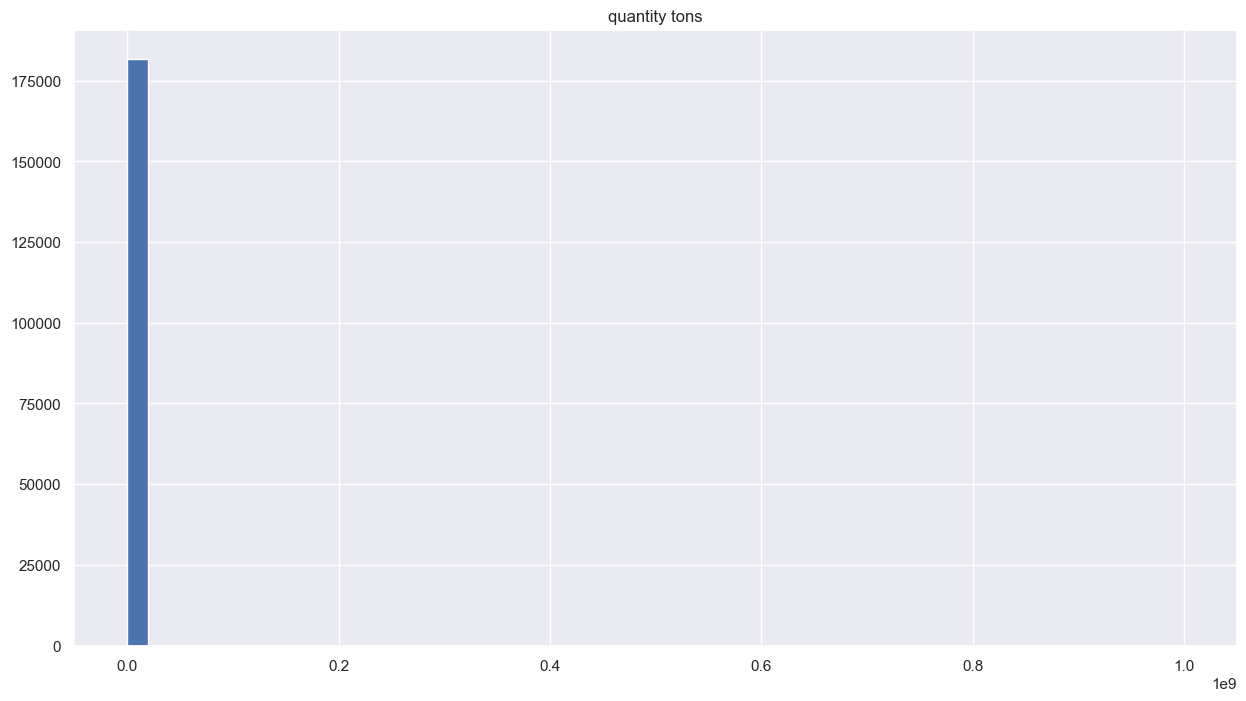

In [37]:
figure = df['quantity tons'].hist(bins=50)
figure.set_title('quantity tons')

<Axes: >

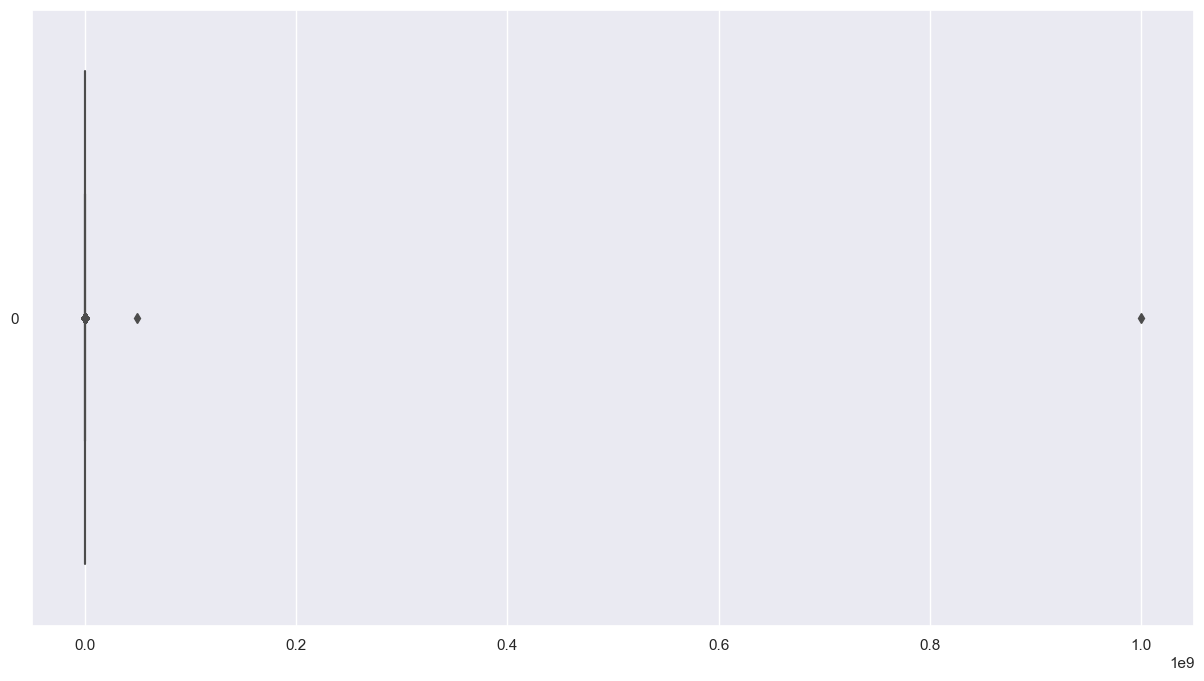

In [38]:
sns.boxplot(df['quantity tons'], orient= 'h')

In [39]:
df['quantity tons'].describe()

count    1.816730e+05
mean     5.874894e+03
std      2.349075e+06
min     -2.000000e+03
25%      1.097037e+01
50%      3.036464e+01
75%      6.716038e+01
max      1.000000e+09
Name: quantity tons, dtype: float64

In [40]:
q1 = df['quantity tons'].quantile(0.25)
print('q1', q1)
q3 = df['quantity tons'].quantile(0.75)
print('q3', q3)
median = df['quantity tons'].median()
print('median', median)
iqr = q3 - q1
print('iqr', iqr)
lower_bound = q1 - 3 * iqr
print('lower_bound', lower_bound)
upper_bound = q3 + 3 * iqr
print('upper_bound', upper_bound)

q1 10.970373783598884
q3 67.16038468252718
median 30.364635452942412
iqr 56.19001089892829
lower_bound -157.599658913186
upper_bound 235.7304173793121


In [41]:
df[df['quantity tons']<=0]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration
105730,2020-11-11,-4.000000,30203192.0,27.0,Won,S,15.0,1.50,1500.0,78400840311F60SAG,1332077137,723.0,51 days
131473,2020-10-02,-1.476794,30199273.0,27.0,Draft,S,10.0,0.60,1220.0,111598,611993,22.0,91 days
181661,2020-07-02,-18.000000,30200854.0,25.0,Won,W,41.0,0.84,1220.0,1000776,164141591,590.0,1 days
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,601.0,1 days


In [42]:
##since weight cannot be negative but the values seems to be within range so i tried removing minus sign from the values to see how it works.
df['quantity tons'] = np.where(df['quantity tons']<-1000, q1, df['quantity tons'])
df['quantity tons'] = np.where(df['quantity tons']<0,df['quantity tons'].abs() , df['quantity tons'])

In [43]:
df[df['quantity tons']>1.000000e+05]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration
173022,2020-07-14,1.000000e+09,30205728.0,30.0,Not lost for AM,S,10.0,0.85,1250.0,DX51D+Z,164141591,583.00,79 days
173211,2020-07-14,5.000000e+07,30200964.0,25.0,Not lost for AM,W,41.0,0.88,1245.0,SH S355MC-CAT_A,611993,885.64,13 days


In [44]:
df['quantity tons'] = np.where(df['quantity tons']>1.000000e+05,upper_bound , df['quantity tons'])

Text(0.5, 1.0, 'quantity tons')

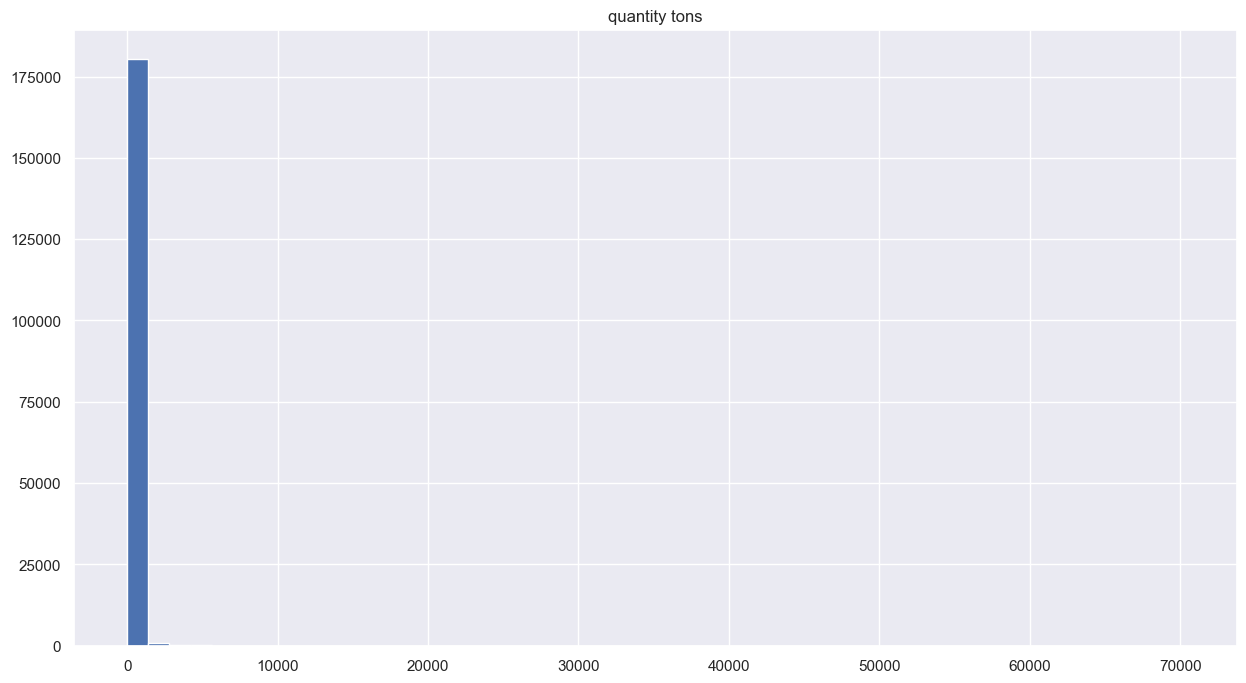

In [45]:
figure = df['quantity tons'].hist(bins=50)
figure.set_title('quantity tons')

<Axes: >

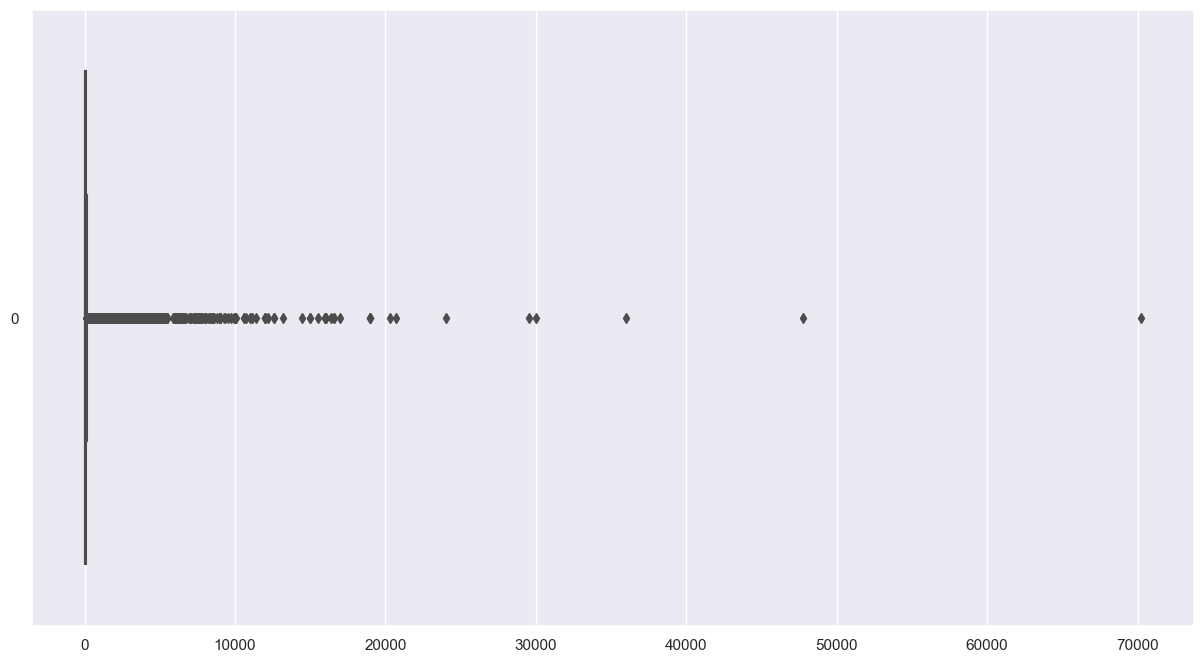

In [46]:
sns.boxplot(df['quantity tons'], orient= 'h')

In [47]:
from scipy import stats

<Axes: xlabel='quantity_tons_transformed', ylabel='Density'>

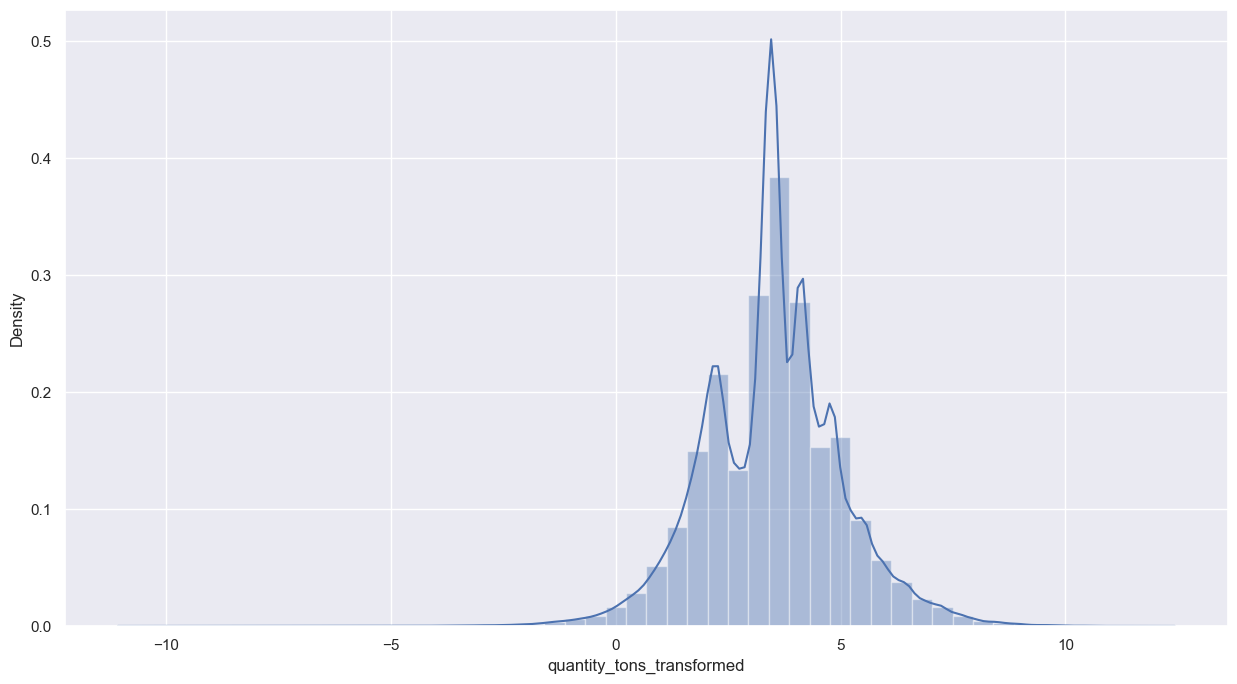

In [48]:
df['quantity_tons_transformed'] , parameters = stats.boxcox(df['quantity tons'])
sns.distplot(df['quantity_tons_transformed'])

In [49]:
df.drop(columns='quantity tons', axis=1, inplace = True)

### thickness

<Axes: xlabel='thickness', ylabel='Density'>

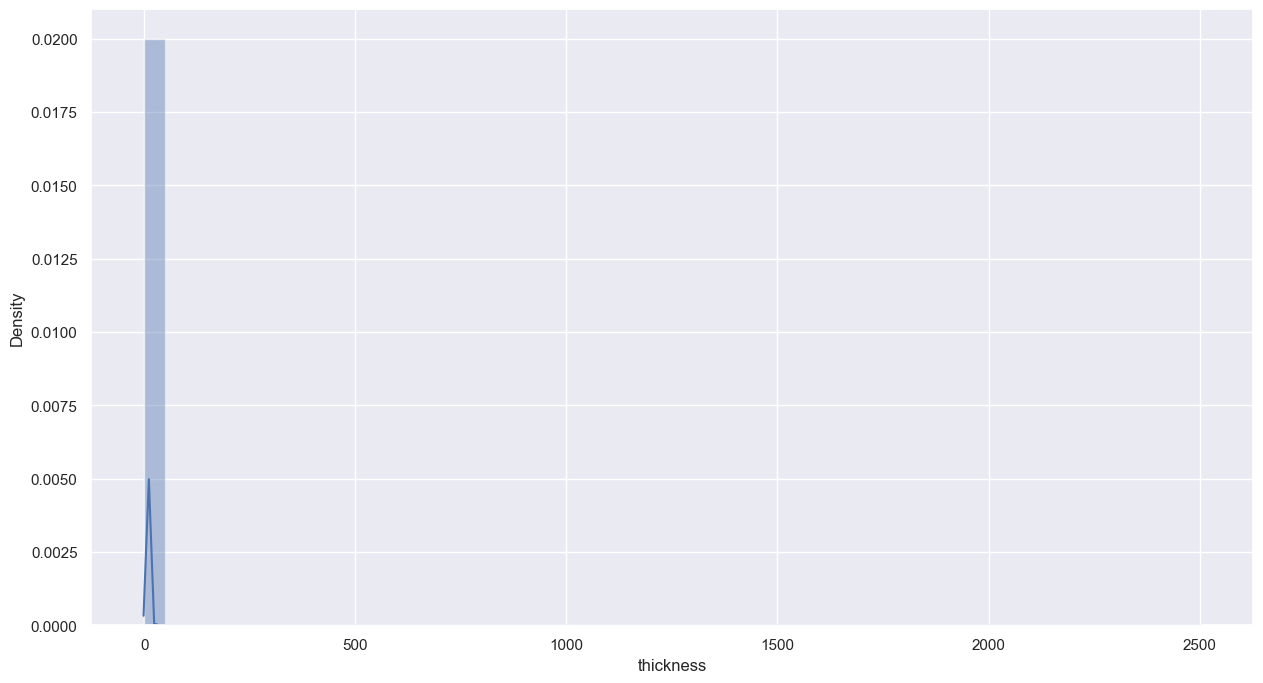

In [50]:
sns.distplot(df['thickness'])

<Axes: >

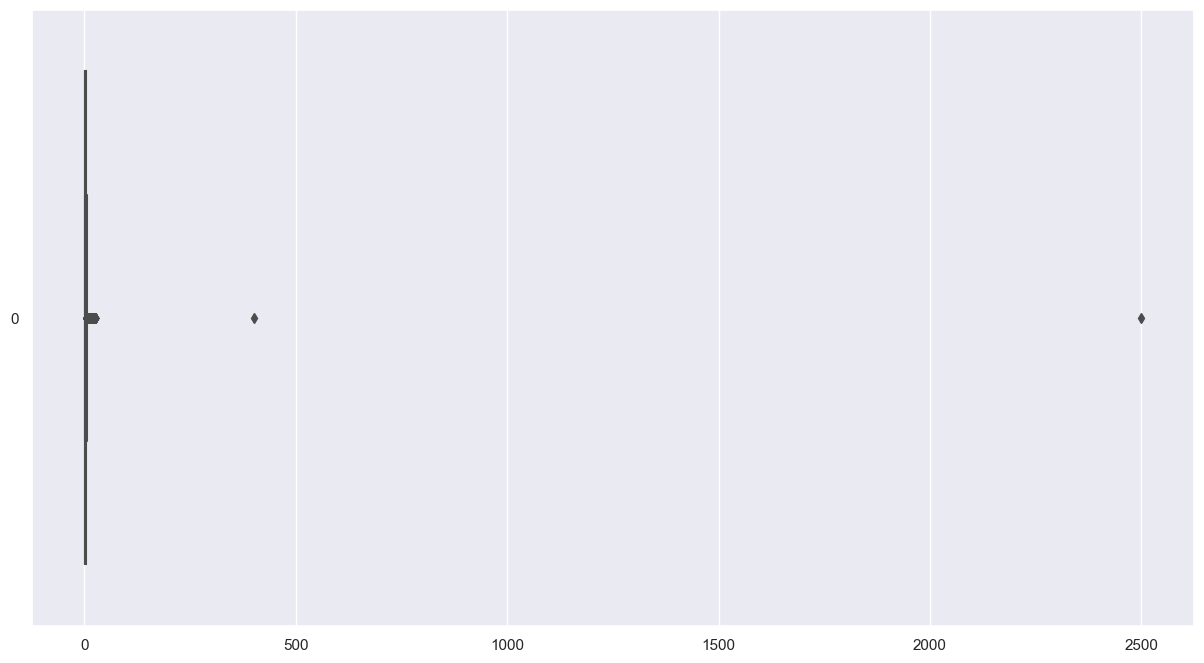

In [51]:
sns.boxplot(df['thickness'], orient='h')

In [52]:
df[df['thickness']<0]

,item_date,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration,quantity_tons_transformed


In [53]:
df[df['thickness']>250]

,item_date,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration,quantity_tons_transformed
41,2021-04-01,30202938.0,25.0,Won,W,41.0,2500.0,1260.0,101952,1670798778,0.0,0 days,4.206190
45001,2021-02-03,30201113.0,84.0,Won,S,15.0,400.0,1500.0,GR. 170 / 3.1 / (-),1670798778,878.0,148 days,4.088193


In [54]:
df['thickness'].describe()

count    181673.000000
mean          2.564822
std           6.572303
min           0.180000
25%           0.700000
50%           1.500000
75%           3.000000
max        2500.000000
Name: thickness, dtype: float64

In [55]:
q1 = df['thickness'].quantile(0.25)
print('q1', q1)
q3 = df['thickness'].quantile(0.75)
print('q3', q3)
median = df['thickness'].median()
print('median', median)
iqr = q3 - q1
print('iqr', iqr)
lower_bound = q1 - 3 * iqr
print('lower_bound', lower_bound)
upper_bound = q3 + 3 * iqr
print('upper_bound', upper_bound)

q1 0.7
q3 3.0
median 1.5
iqr 2.3
lower_bound -6.199999999999999
upper_bound 9.899999999999999


In [56]:
df['thickness'] = np.where(df['thickness']>250, upper_bound, df['thickness'])

<Axes: xlabel='thickness_transformed', ylabel='Density'>

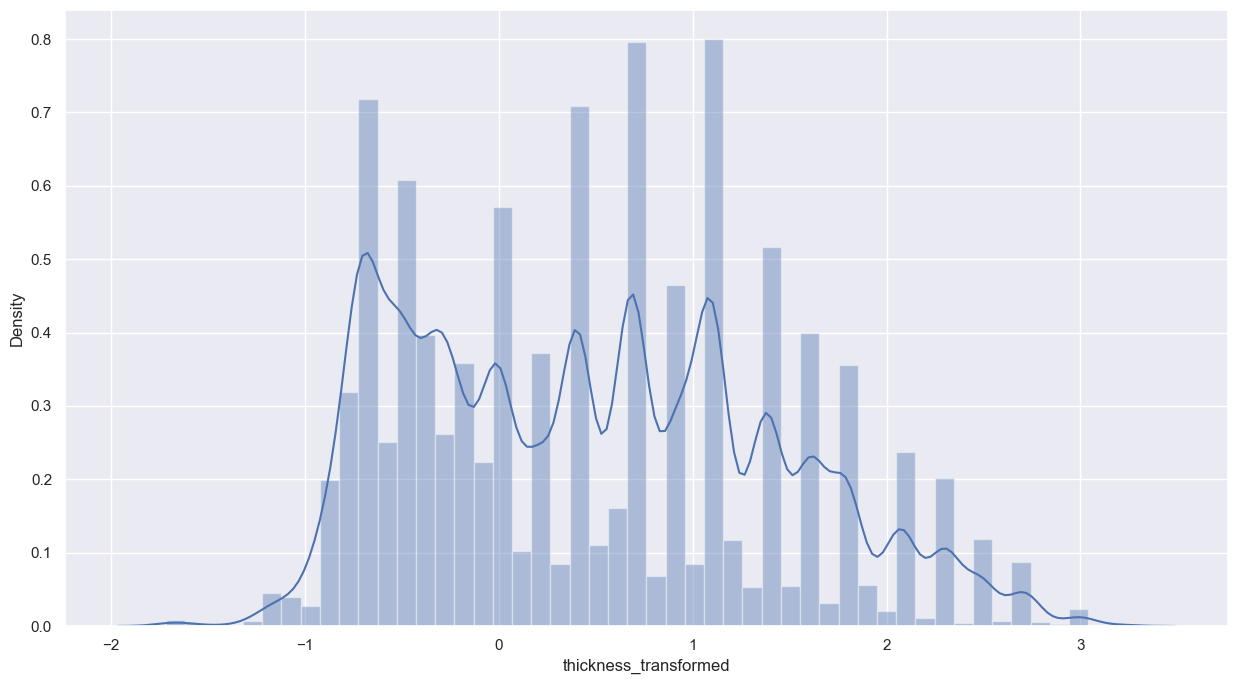

In [57]:
df['thickness_transformed'] = np.log(df['thickness'])
sns.distplot(df['thickness_transformed'])

In [58]:
df.drop(columns='thickness', axis=1, inplace = True)

### width 

<Axes: xlabel='width', ylabel='Density'>

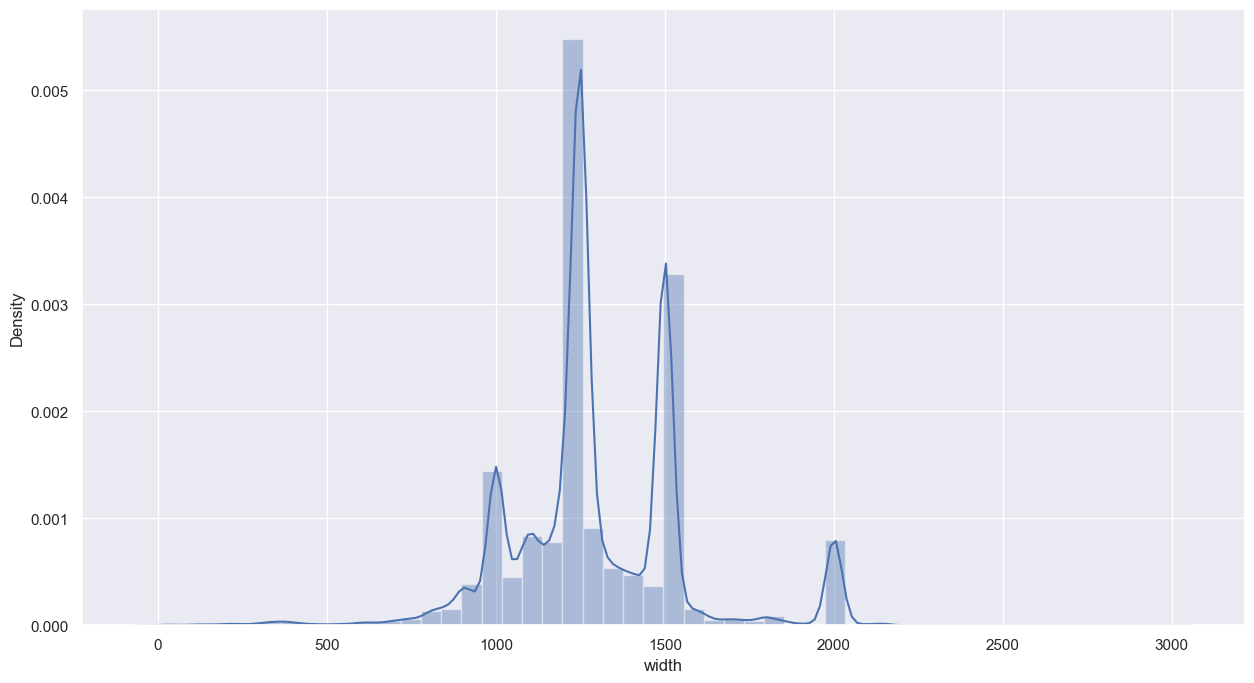

In [59]:
sns.distplot(df['width'])

<Axes: >

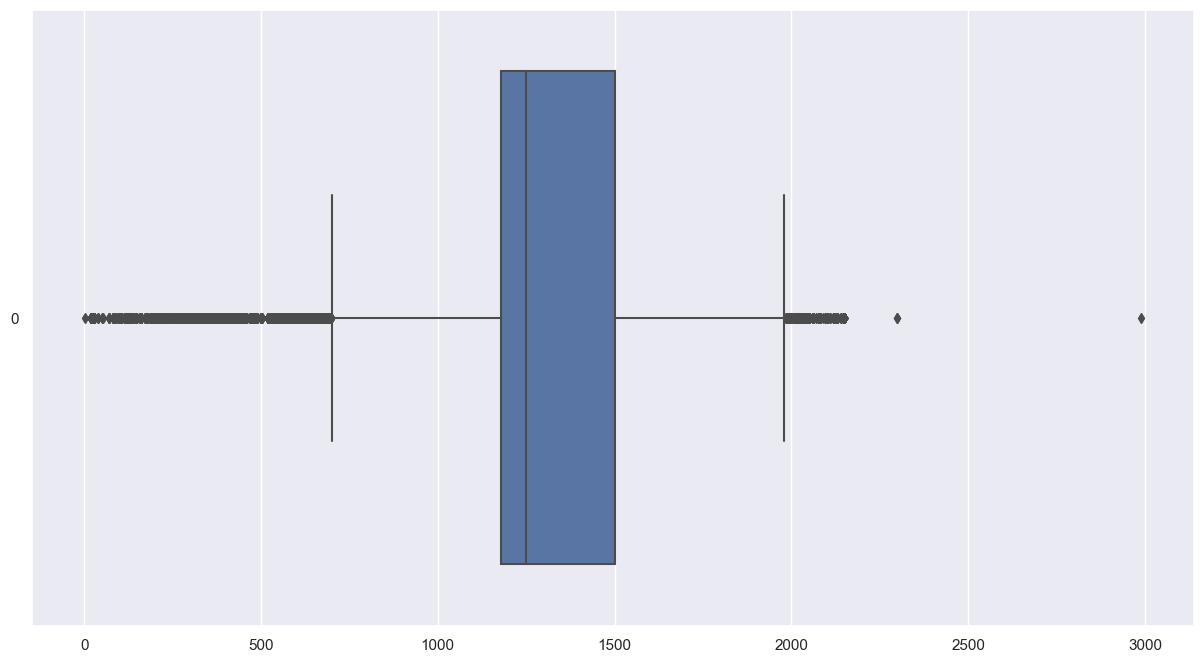

In [60]:
sns.boxplot(df['width'], orient='h')

In [61]:
df['width'].describe()

count    181673.000000
mean       1295.286724
std         261.631754
min           1.000000
25%        1180.000000
50%        1250.000000
75%        1500.000000
max        2990.000000
Name: width, dtype: float64

In [62]:
upper_bound_width = df['width'].mean() + 3*df['width'].std()
lower_bound_width = df['width'].mean() - 3*df['width'].std()
print('upper_bound_width', upper_bound_width)
print('lower_bound_width', lower_bound_width)

upper_bound_width 2080.181985958154
lower_bound_width 510.3914616097286


### selling_price

<Axes: xlabel='selling_price', ylabel='Density'>

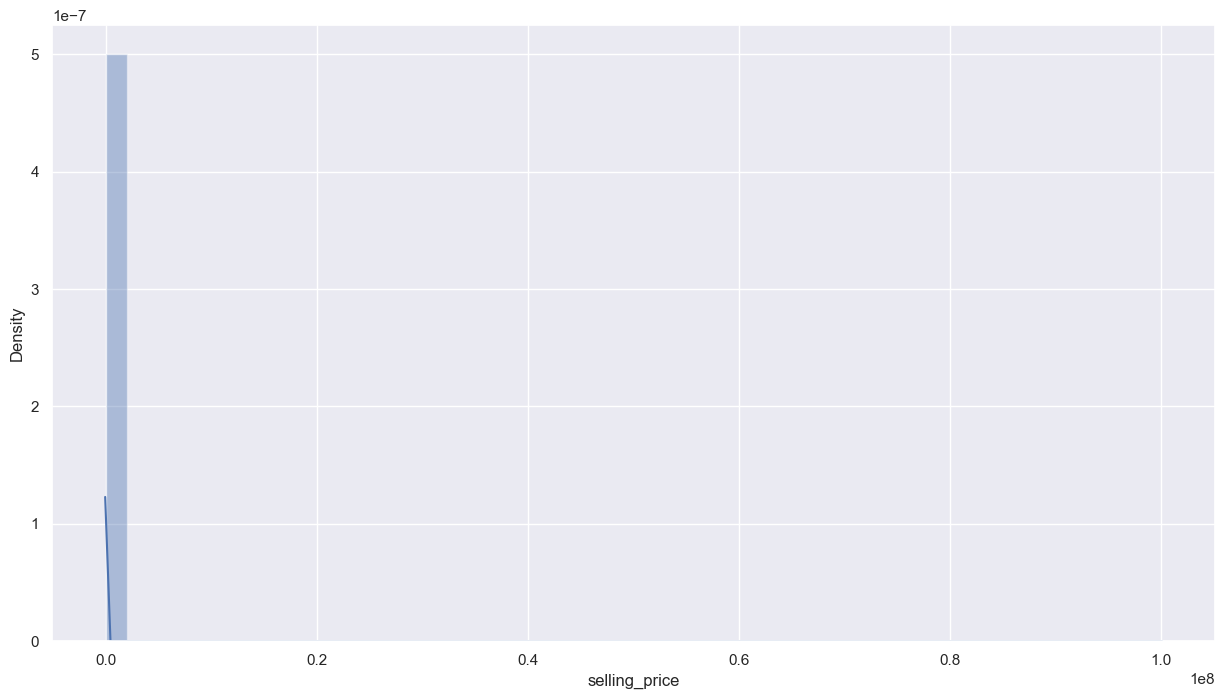

In [63]:
sns.distplot(df['selling_price'])

<Axes: >

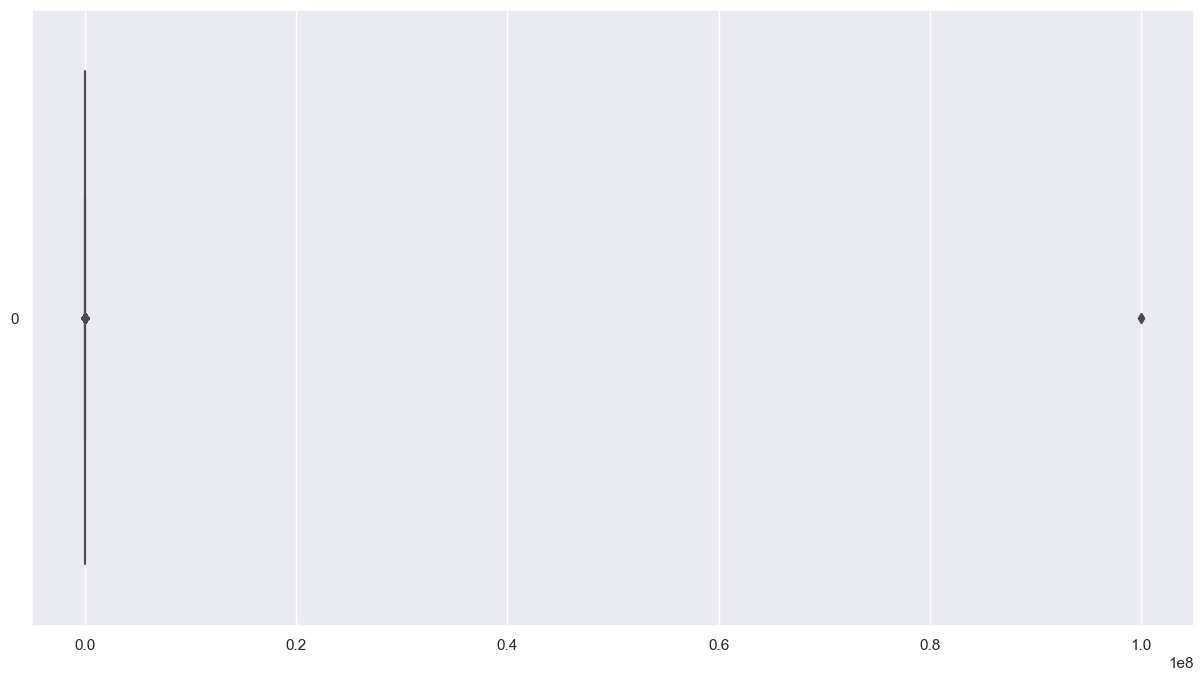

In [64]:
sns.boxplot(df['selling_price'], orient='h')

In [65]:
df['selling_price'].describe()

count    1.816730e+05
mean     1.918029e+03
std      3.317947e+05
min     -1.160000e+03
25%      6.690000e+02
50%      8.120000e+02
75%      9.530000e+02
max      1.000010e+08
Name: selling_price, dtype: float64

In [66]:
q1 = df['selling_price'].quantile(0.25)
print('q1', q1)
q3 = df['selling_price'].quantile(0.75)
print('q3', q3)
median = df['selling_price'].median()
print('median', median)
iqr = q3 - q1
print('iqr', iqr)
lower_bound = q1 - 3 * iqr
print('lower_bound', lower_bound)
upper_bound = q3 + 3 * iqr
print('upper_bound', upper_bound)

q1 669.0
q3 953.0
median 812.0
iqr 284.0
lower_bound -183.0
upper_bound 1805.0


In [67]:
df[df['selling_price']>1e4]

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,selling_price,duration,quantity_tons_transformed,thickness_transformed
10228,2021-03-18,30353306.0,107.0,To be approved,S,56.0,1254.0,S235JR+AR LARG SUP 1500 CVLT,1721130331,1.000009e+08,76 days,3.876351,-0.916291
36192,2021-02-19,30217607.0,27.0,Not lost for AM,PL,10.0,1446.0,95932,164141591,1.000010e+08,71 days,2.191983,-0.510826
123570,2020-10-14,30229766.0,84.0,Won,W,41.0,1250.0,SUB6.G1015 GRANITE STD,611993,8.123614e+04,13 days,0.585872,-0.693147
124547,2020-10-13,30205658.0,32.0,Won,W,10.0,1000.0,401002001250,611993,1.091300e+04,80 days,2.286351,-0.287682


In [68]:
df['selling_price'] = np.where(df['selling_price']<=0, q1, df['selling_price'])

In [69]:
df['selling_price'] = np.where(df['selling_price']>1e4, upper_bound, df['selling_price'])

<Axes: xlabel='selling_price', ylabel='Density'>

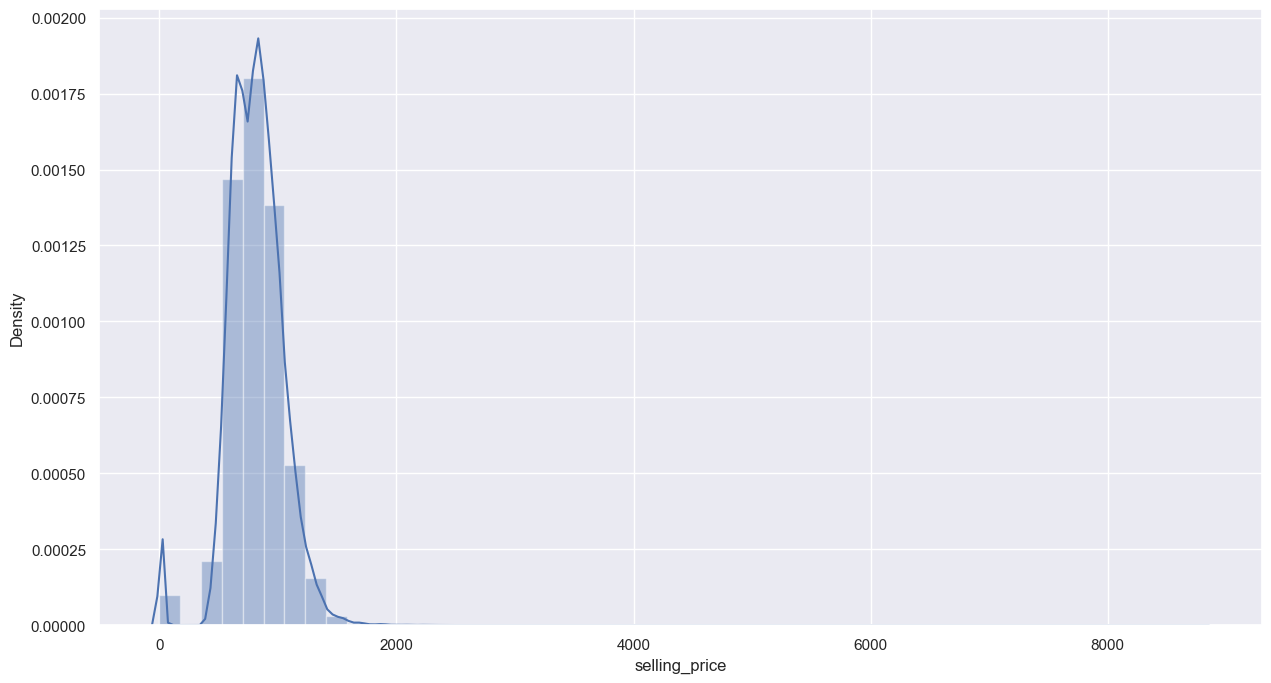

In [70]:
sns.distplot(df['selling_price'])

<Axes: xlabel='selling_price_transformed', ylabel='Density'>

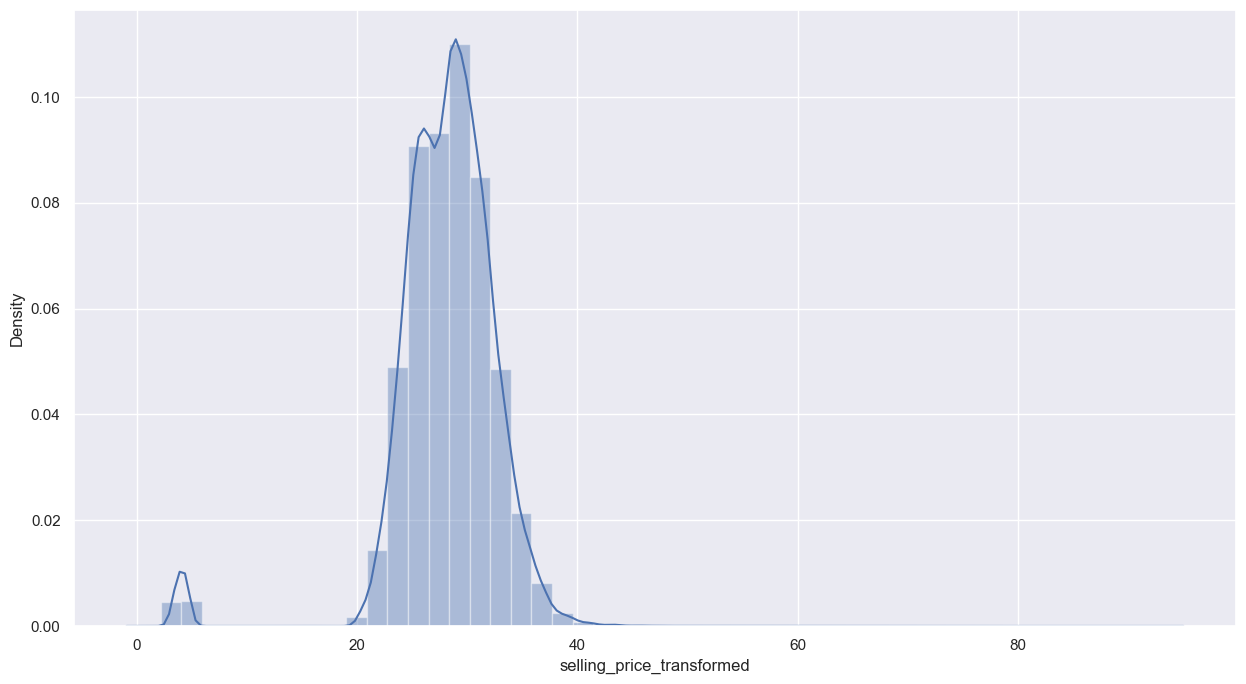

In [71]:
df['selling_price_transformed'] = (df['selling_price'])**(1/2)
sns.distplot(df['selling_price_transformed'])

In [72]:
df.drop(columns='selling_price', axis=1, inplace = True)

### Encoding categorical features

In [73]:
## frequency or count encoding is done for status, item type, material_ref
for feature in ['status', 'item type', 'material_ref']:
    feature_map = df[feature].value_counts().to_dict()
    df[feature+'_encoded'] = df[feature].map(feature_map)

In [74]:
df.head()

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,duration,quantity_tons_transformed,thickness_transformed,selling_price_transformed,status_encoded,item type_encoded,material_ref_encoded
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,91 days,4.099593,0.693147,29.223278,116012,105615,14
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,0 days,6.946056,-0.223144,32.357379,116012,105615,7
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,90 days,6.198327,-0.967584,25.383656,116012,524,3
3,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,90 days,5.502231,0.832909,27.712813,116012,69236,15
4,2021-04-01,30211560.0,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,31 days,6.970672,1.386294,24.020824,116012,105615,39


In [75]:
df.drop(columns=['status', 'item type', 'material_ref'], inplace=True)

In [76]:
df.head()

,item_date,customer,country,application,width,product_ref,duration,quantity_tons_transformed,thickness_transformed,selling_price_transformed,status_encoded,item type_encoded,material_ref_encoded
0,2021-04-01,30156308.0,28.0,10.0,1500.0,1670798778,91 days,4.099593,0.693147,29.223278,116012,105615,14
1,2021-04-01,30202938.0,25.0,41.0,1210.0,1668701718,0 days,6.946056,-0.223144,32.357379,116012,105615,7
2,2021-04-01,30153963.0,30.0,28.0,952.0,628377,90 days,6.198327,-0.967584,25.383656,116012,524,3
3,2021-04-01,30349574.0,32.0,59.0,1317.0,1668701718,90 days,5.502231,0.832909,27.712813,116012,69236,15
4,2021-04-01,30211560.0,28.0,10.0,2000.0,640665,31 days,6.970672,1.386294,24.020824,116012,105615,39


In [77]:
df['duration_days'] = df['duration'].astype(str)

In [78]:
df['duration_days'] = df['duration_days'].str.split(' ').str[0]

In [79]:
df['duration_days'] = df['duration_days'].astype(int)

In [80]:
df.drop(columns='duration', axis=1, inplace=True)

In [81]:
df['item_date'] = df['item_date'].astype(str)

In [82]:
df['item_delivery_year'] = df['item_date'].apply(lambda x : x.split('-')[0])
df['item_delivery_month'] = df['item_date'].apply(lambda x : x.split('-')[1])
df['item_delivery_date'] = df['item_date'].apply(lambda x : x.split('-')[2])

In [83]:
df.drop(columns='item_date', axis=1,inplace=True)

In [84]:
df['item_delivery_year'] = df['item_delivery_year'].astype(int)
df['item_delivery_month'] = df['item_delivery_month'].astype(int)
df['item_delivery_date'] = df['item_delivery_date'].astype(int)

In [85]:
df.head()

,customer,country,application,width,product_ref,quantity_tons_transformed,thickness_transformed,selling_price_transformed,status_encoded,item type_encoded,material_ref_encoded,duration_days,item_delivery_year,item_delivery_month,item_delivery_date
0,30156308.0,28.0,10.0,1500.0,1670798778,4.099593,0.693147,29.223278,116012,105615,14,91,2021,4,1
1,30202938.0,25.0,41.0,1210.0,1668701718,6.946056,-0.223144,32.357379,116012,105615,7,0,2021,4,1
2,30153963.0,30.0,28.0,952.0,628377,6.198327,-0.967584,25.383656,116012,524,3,90,2021,4,1
3,30349574.0,32.0,59.0,1317.0,1668701718,5.502231,0.832909,27.712813,116012,69236,15,90,2021,4,1
4,30211560.0,28.0,10.0,2000.0,640665,6.970672,1.386294,24.020824,116012,105615,39,31,2021,4,1


In [86]:
df['item_delivery_date'].unique()

array([ 1, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 19, 18, 17, 16, 15, 14,
       13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2, 21, 20])

since delivery date contains only one value , dropping delivery_date column

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   customer                   181673 non-null  float64
 1   country                    181673 non-null  float64
 2   application                181673 non-null  float64
 3   width                      181673 non-null  float64
 4   product_ref                181673 non-null  int64  
 5   quantity_tons_transformed  181673 non-null  float64
 6   thickness_transformed      181673 non-null  float64
 7   selling_price_transformed  181673 non-null  float64
 8   status_encoded             181673 non-null  int64  
 9   item type_encoded          181673 non-null  int64  
 10  material_ref_encoded       181673 non-null  int64  
 11  duration_days              181673 non-null  int32  
 12  item_delivery_year         181673 non-null  int32  
 13  item_delivery_month        18

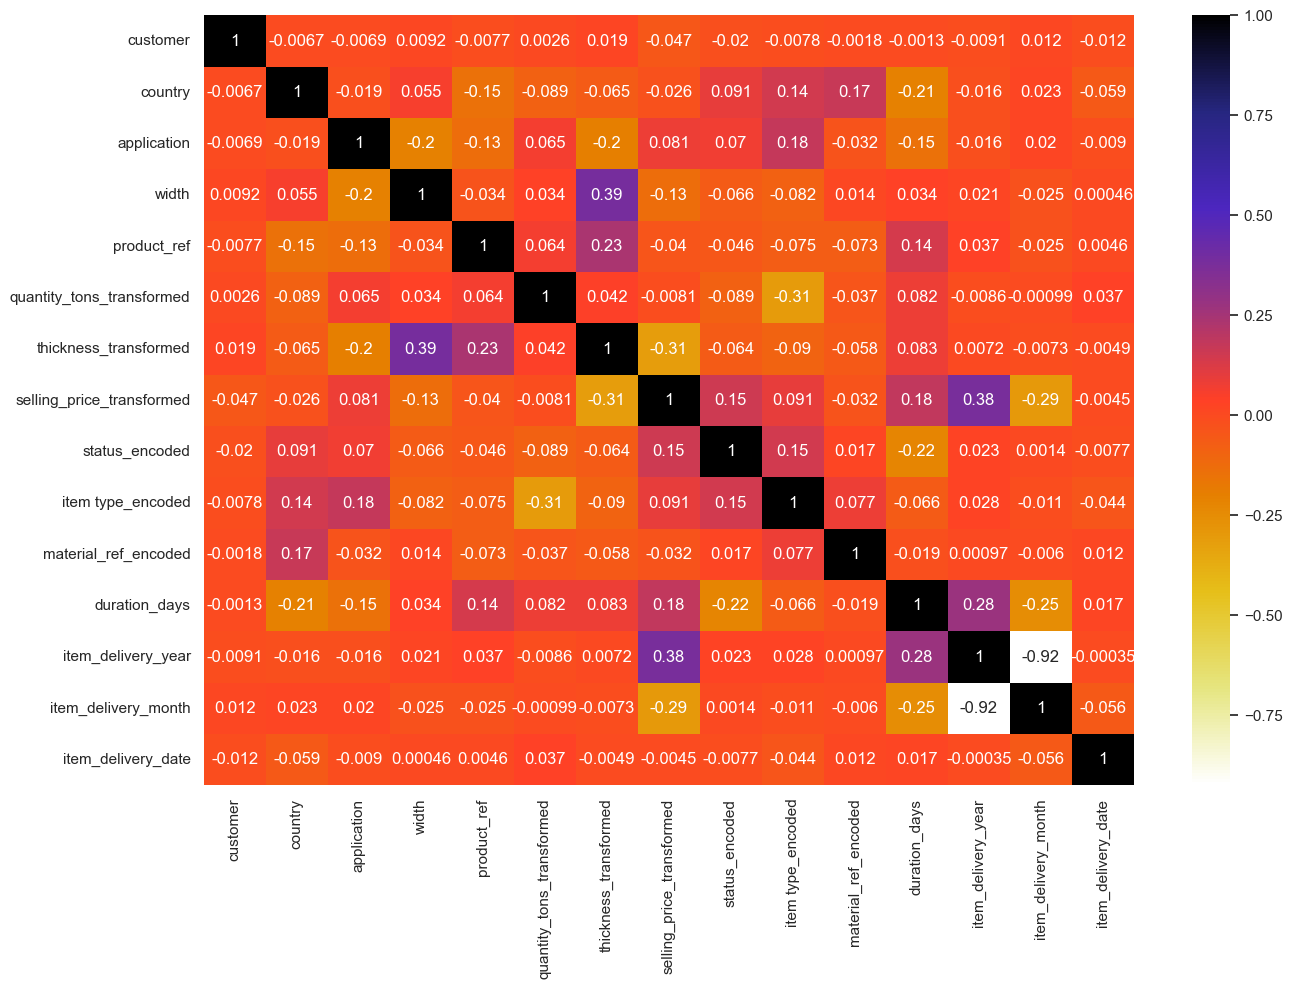

In [88]:
plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [89]:
## Assigning features into input(X) and ouput(y)
X = df.drop(labels=['selling_price_transformed'], axis=1)
y = df['selling_price_transformed']

In [90]:
## Splitting dataset for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Model Training and Evaluation 

Started with linear regression to see how it performs

In [91]:
## Scaling down all the features into similar scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [92]:
## Creating regression object for linear regression
regression = LinearRegression()

In [93]:
## Fitting the model into x_train and y_train
regression.fit(X_train,y_train)

LinearRegression()

In [94]:
X_test = scaler.transform(X_test)

In [95]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [96]:
score=r2_score(y_test,y_pred)
print(score)

0.31118436253332815


In [97]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

15.369120618514923
2.1064118787465014
3.9203470023092244


R2 score is very much low for linear regression so tried decision which I thought might perform well

In [144]:
dt_regressor = DecisionTreeRegressor()

In [145]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [146]:
y_pred = dt_regressor.predict(X_test)

In [147]:
score_dt=r2_score(y_test,y_pred)
print(score_dt)

0.9396178574752541


In [148]:
mse_dt = mean_squared_error(y_test,y_pred)
mae_dt = mean_absolute_error(y_test,y_pred)
rmse_dt = np.sqrt(mse_dt)
print(mse_dt)
print(mae_dt)
print(rmse_dt)

1.347269691902258
0.5404586131061556
1.160719471664992


Decision tree does give me very good r2 score so tried hyperparameter tuning to see if I can improve perormance of the model

### Hyperparameter tuning

### RandomSearch CV

In [94]:
dt_params = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'splitter' : ['best', 'random'],
             'max_depth' : [1,2,3,4,5,10,15,20,25],
             'max_features' : ['auto','sqrt','log2'],
             'min_samples_split' : [2, 8, 15, 20, 30, 50, 100],
             'random_state' : [0, 2, 4, 8, 25, 50, 100]}

In [95]:
random = RandomizedSearchCV(estimator=dt_regressor, param_distributions=dt_params, n_iter=100, cv=3, verbose=2, n_jobs=-1)

In [96]:
random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 10, 15, 20,
                                                      25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 8, 15, 20, 30,
                                                              50, 100],
                                        'random_state': [0, 2, 4, 8, 25, 50,
                                                         100],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [98]:
random.best_params_

{'splitter': 'best',
 'random_state': 2,
 'min_samples_split': 50,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'poisson'}

### Gridsearch CV

In [108]:
regressor1 = DecisionTreeRegressor(criterion = 'poisson', splitter = 'best', max_features = 'auto')

In [109]:
params = {'max_depth' : [10, 15, 20, 25, 30],
          'min_samples_split' : [20, 30, 50, 75],
          'random_state' : [0, 2, 4, 6]}

In [110]:
grid=GridSearchCV(estimator=regressor1,param_grid=params,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='poisson',
                                             max_features='auto'),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_split': [20, 30, 50, 75],
                         'random_state': [0, 2, 4, 6]},
             scoring='neg_mean_squared_error')

In [111]:
grid.best_params_

{'max_depth': 30, 'min_samples_split': 30, 'random_state': 2}

In [112]:
y_pred = grid.predict(X_test)

In [ ]:
grid_score=r2_score(y_test,y_pred)
print(grid_score)

In [114]:
dt_best_model = DecisionTreeRegressor(criterion = 'poisson', splitter = 'best', max_features = 'auto', max_depth = 30, 
                                   min_samples_split = 30,random_state = 2)

In [115]:
dt_best_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=30, max_features='auto',
                      min_samples_split=30, random_state=2)

In [116]:
score2=r2_score(y_test,y_pred)
print(score2)

0.9498286456099514


In [117]:
mse2=mean_squared_error(y_test,y_pred)
mae2=mean_absolute_error(y_test,y_pred)
rmse2=np.sqrt(mse2)
print(mse2)
print(mae2)
print(rmse2)

1.1194426422298303
0.5690219954033235
1.0580371648622888


Hyperparameter tuning did improve the model performance but I came to know about lazypredict library which checks for all the possible models and gives out the performance score

In [97]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

X, y = shuffle(df.drop(labels=['selling_price_transformed'], axis=1), df['selling_price_transformed'], random_state=13)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 98%|█████████████████████████████████████████████████████████████████████████████  | 41/42 [2:00:13<05:08, 308.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1504
[LightGBM] [Info] Number of data points in the train set: 163505, number of used features: 13
[LightGBM] [Info] Start training from score 28.186024


100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [2:00:17<00:00, 171.83s/it]


                                   Adjusted R-Squared               R-Squared   
Model                                                                           
RandomForestRegressor                            0.97                    0.97  \
BaggingRegressor                                 0.97                    0.97   
ExtraTreesRegressor                              0.97                    0.97   
XGBRegressor                                     0.96                    0.96   
DecisionTreeRegressor                            0.96                    0.96   
ExtraTreeRegressor                               0.95                    0.95   
HistGradientBoostingRegressor                    0.95                    0.95   
LGBMRegressor                                    0.95                    0.95   
GradientBoostingRegressor                        0.92                    0.92   
KNeighborsRegressor                              0.74                    0.74   
AdaBoostRegressor           

Random forest does give best result but takes lot of time for execution so, I went with bagging regressor

### Bagging Regressor

In [113]:
regressor = BaggingRegressor(n_estimators=10, random_state=2)

In [102]:
regressor.fit(X_train, y_train)

BaggingRegressor(random_state=2)

In [103]:
y_pred = regressor.predict(X_test)

In [104]:
score_BaggingRegressor = r2_score(y_test,y_pred)
print(score_BaggingRegressor)

0.9644840899146297


In [105]:
mse_BaggingRegressor = mean_squared_error(y_test,y_pred)
mae_BaggingRegressor = mean_absolute_error(y_test,y_pred)
rmse_BaggingRegressor = np.sqrt(mse_BaggingRegressor)
print(mse_BaggingRegressor)
print(mae_BaggingRegressor)
print(rmse_BaggingRegressor)

0.7924447069551276
0.4613891368143916
0.8901936345285376


Bagging regressor provides best performance so I did hyperparameter tuning to see if there is further improvement

In [92]:
regressor_Bagging = BaggingRegressor()

In [93]:
param_Bagging = {'n_estimators' : [10, 25, 50, 100, 150],
          'random_state' : [0, 2, 4, 6, 8, 10]}

In [94]:
grid=GridSearchCV(estimator=regressor_Bagging,param_grid=param_Bagging,cv=5,n_jobs=-1)

<IPython.core.display.Javascript object>

In [95]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 25, 50, 100, 150],
                         'random_state': [0, 2, 4, 6, 8, 10]})

In [96]:
grid.best_params_

{'n_estimators': 150, 'random_state': 6}

In [97]:
grid.best_estimator_

BaggingRegressor(n_estimators=150, random_state=6)

In [98]:
y_pred_grid = grid.best_estimator_.predict(X_test)

In [99]:
score_BaggingRegressor = r2_score(y_test,y_pred_grid)
print(score_BaggingRegressor)

0.9663444876598934


In [106]:
bagging_best_model = BaggingRegressor(n_estimators=150, random_state=6)

In [107]:
bagging_best_model.fit(X_train, y_train)

BaggingRegressor(n_estimators=150, random_state=6)

In [108]:
y_pred_best = bagging_best_model.predict(X_test)

In [111]:
score_best_BaggingRegressor = r2_score(y_test,y_pred_best)
print(score_best_BaggingRegressor)

0.9663444876598934


In [112]:
mse_best_BaggingRegressor = mean_squared_error(y_test,y_pred)
mae_best_BaggingRegressor = mean_absolute_error(y_test,y_pred)
rmse_best_BaggingRegressor = np.sqrt(mse_best_BaggingRegressor)
print(mse_best_BaggingRegressor)
print(mae_best_BaggingRegressor)
print(rmse_best_BaggingRegressor)

0.7924447069551276
0.4613891368143916
0.8901936345285376


After hyperparameter tuning there is no much difference so selecting bagging regressor for model training